# Guided Project: Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd

In [2]:
#Let's read in the two datasets

fandango_score = pd.read_csv('fandango_score_comparison.csv')
movie_ratings = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
fandango_score.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
movie_ratings.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
#Let's isolate the columns we will use

fandango = fandango_score[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

fandango.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
ratings = movie_ratings[['movie', 'year', 'fandango']]
ratings.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


After consulting the README.md files for both datasets, we found out that:

- the `fandango_score_comparison.csv` dataset contains every film that has a [Rotten Tomatoes](https://www.rottentomatoes.com/) rating, a RT User rating, a [Metacritic](https://www.metacritic.com/) score, a Metacritic User score, and [IMDb](https://www.imdb.com/) score, and at least 30 fan reviews on Fandango. The data was pulled on Aug. 24, 2015.
- the `movie_ratings_16_17.csv` dataset contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date.


The sampling of the two datasets is not random - the first one focuses on movies with at least 30 fan reviews, whereas the second focuses on the "most popular movies".

The two datasets contain information on different movies, so it will not be possible to check whether Hickey's article lead to any changes on Fandango's rating score.

## Changing our goal

Since we will not be able to reach our current goal using the two datasets, let's slightly redefine what we are trying to achieve. We will now focus on finding out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

With the new goal, we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

The `fandango` dataset already fits the popular requirement. However, it does not have a column for the release year. We will extract the release year from the `FILM` column.

As for the `ratings` dataset, we need to isolate the movies released in 2016.

In [7]:
fandango['year'] = fandango['FILM'].str[-5:-1].copy()
fandango['year'].unique()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array(['2015', '2014'], dtype=object)

In [8]:
#Since there are movies from 2014, we need to remove them

movies_2015 = fandango[fandango['year'] == '2015']

In [9]:
movies_2016 = ratings[ratings['year'] == 2016]

## Comparing Distribution Shapes for 2015 and 2016

After all these preliminary steps, we can now start analyzing the two samples we isolated before. Once again, our goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

There are many ways we can go about with our analysis, but let's start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples.

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')

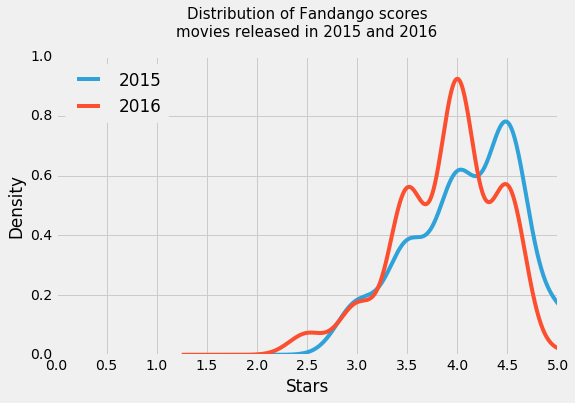

In [11]:
movies_2015['Fandango_Stars'].plot.kde(label=2015, figsize=(8,5))
movies_2016['fandango'].plot.kde(label=2016)
plt.title('Distribution of Fandango scores\nmovies released in 2015 and 2016', fontsize=15, y=1.05)
plt.legend(loc='upper left')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.xlabel('Stars')
plt.show()

- Both density plots are left skewed, meaning that the scores tend to be higher.
- The majority of 2015 movies have a rating fo 4.5, whereas the 2016 ones have a rating fo 4.
- The 2015 ratings start at about 2, whereas the 2016 start between 1 and 1.5.

This all showa that ratings were slightly lowe in 2016 compared to 2015.

## Comparing Relative Frequencies

While comparing the distributions with the help of the kernel density plots was a great start, let's now need to analyze more granular information.

In [12]:
print('2015:\n-------')

(movies_2015['Fandango_Stars'].value_counts(normalize=True)*100).sort_index()

2015:
-------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [13]:
print('2016:\n-------')

(movies_2016['fandango'].value_counts(normalize=True)*100).sort_index()

2016:
-------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

We see that more movies received higher ratings (4.5 and 5) in 2015 compared to in 2016. The most frequent rating in 2015 was 4.5 whereas in 2016 it dropped to 4. In 2015 no movie had a lower ating than 3. In 2016 the lowest rating was 2.5.

## Mean, median and mode

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [14]:
mean_15 = movies_2015['Fandango_Stars'].mean()
median_15 = movies_2015['Fandango_Stars'].median()
mode_15 = movies_2015['Fandango_Stars'].mode()

mean_16 = movies_2016['fandango'].mean()
median_16 = movies_2016['fandango'].median()
mode_16 = movies_2016['fandango'].mode()

In [15]:
stats_15 = pd.DataFrame([mean_15, median_15, mode_15[0]], index=['Mean', 'Median', 'Mode'], columns=['2015'])
stats_16 = pd.DataFrame([mean_16, median_16, mode_16[0]], index=['Mean', 'Median', 'Mode'], columns=['2016'])
stats = pd.concat([stats_15, stats_16], axis=1)

stats

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


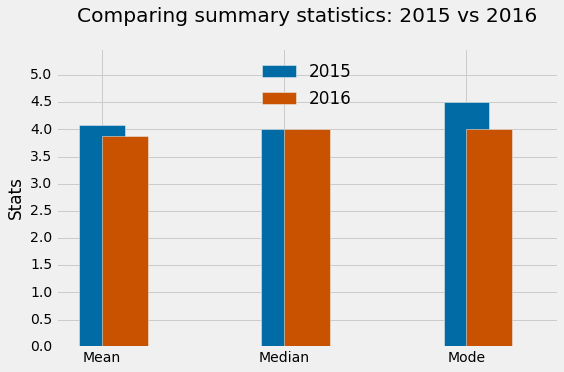

In [16]:
stats['2015'].plot.bar(figsize=(8,5), label='2015', color=(0/255,107/255,164/255), rot=0, align='center', width=0.25)
stats['2016'].plot.bar(label='2016', color=(200/255,82/255,0/255), rot=0, width=0.25, align='edge')
plt.legend(loc='upper center', framealpha=0)
plt.title('Comparing summary statistics: 2015 vs 2016', y=1.07)
plt.ylim(0, 5.5)
plt.yticks([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel('Stats')
plt.show()

## Rotten Tomatoes: Users vs Critics

Let's now compare the ratings given on Rotten Tomatoes by Critics and by Users and see if one or the other are more favorable.

First, we have to isolate the RT columns from the original two datasets. we will keep the following columns:

`fandango_score_comparison.csv`:

- `FILM` - The film in question
- `RottenTomatoes` - The Rotten Tomatoes Tomatometer score for the film
- `RottenTomatoes_User` - The Rotten Tomatoes user score for the film

`movie_ratings_16_17.csv`:

- `movie` - the name of the movie
- `tmeter` - the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score)
- `audience` - the Rotten Tomatoes rating of the movie (user score)

We will then merge them into one dataset.

In [30]:
rt_2015 = fandango_score[['FILM', 'RottenTomatoes', 'RottenTomatoes_User']]
rt_16_17 = movie_ratings[['movie', 'tmeter', 'audience']]

rt_16_17 = rt_16_17.rename(columns={'movie': 'FILM',
                       'tmeter': 'RottenTomatoes',
                        'audience': 'RottenTomatoes_User'})

rt = pd.concat([rt_2015, rt_16_17])

(-5, 120)

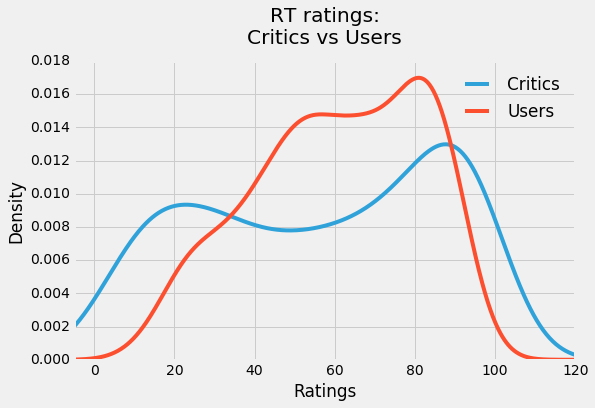

In [52]:
rt['RottenTomatoes'].plot.kde(label='Critics', figsize=(8,5))
rt['RottenTomatoes_User'].plot.kde(label='Users')
plt.legend(loc='best', framealpha=0)
plt.title('RT ratings:\nCritics vs Users', y=1.04)
plt.xlabel('Ratings')
plt.xlim(-5,120,20)

It looks like users are way more generous with their scoring whereas critics are more critical.

Let's compare the mean, mode and median as well.

In [103]:
users_mean = rt['RottenTomatoes_User'].mean()
users_mode = rt['RottenTomatoes_User'].mode()[0]
users_median = rt['RottenTomatoes_User'].median()

critics_mean = rt['RottenTomatoes'].mean()
critics_mode = rt['RottenTomatoes'].mode()[0]
critics_median = rt['RottenTomatoes'].median()

users = pd.DataFrame([users_mean, users_mode, users_median], index=['Mean', 'Mode', 'Median'], columns=['Users'])
critics = pd.DataFrame([critics_mean, critics_mode, critics_median], index=['Mean', 'Mode', 'Median'], 
                               columns=['Critics'])

stats = pd.concat([users, critics], axis=1)

stats

,Users,Critics
Mean,60.755556,56.552778
Mode,81.000000,84.000000
Median,63.000000,60.000000


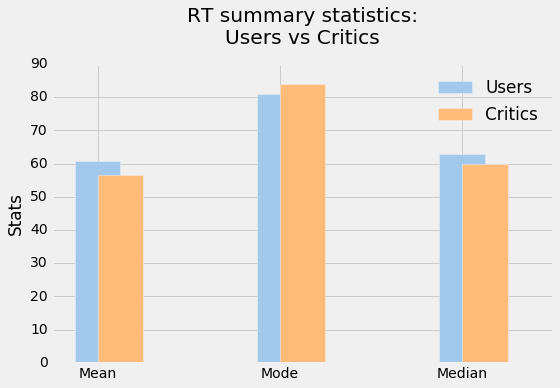

In [102]:
stats['Users'].plot.bar(figsize=(8,5), rot=0, color=(162/255,200/255,236/255), label='Users', align='center', width=0.25)
stats['Critics'].plot.bar(rot=0, color=(255/255,188/255,121/255), label='Critics', align='edge', width=0.25)
plt.legend(loc='best', framealpha=0)
plt.title('RT summary statistics:\nUsers vs Critics', y=1.05)
plt.ylabel('Stats')

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We also compared the way users and critics rate movies on Rotten Tomatoes. It wasn't surprising that on average, critics tend to rate movies lower than users.